# Stock Data Analytics (Time-series Daily) using Alpha Vantage API

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [53]:
#Get your API Key from Alpha Vantage : https://www.alphavantage.co/support/#api-key
API_KEY="YOUR_APIKEY"

In [54]:
# Checking the Daily Trend in Apple Stocks
stock = "AAPL"

In [6]:
#endpoint
url =f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={stock}&apikey={API_KEY                                                                                   }"

In [55]:
#Getting the response from the URL/endpoint and storing in data
response = requests.get(url)
data=response.json()
type(data)

dict

In [15]:
#storing the interested data in d and then converting it to dataframe
d = data['Time Series (Daily)']
df = pd.DataFrame.from_dict(d, orient="index")

In [19]:
df.head(2)

,1. open,2. high,3. low,4. close,5. volume
2024-03-25,170.3900,171.9400,169.4500,170.8500,54243804
2024-03-22,171.7600,173.0500,170.0600,172.2800,71160138


In [24]:
#Going to Change data type from objects to correct datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2024-03-25 to 2023-10-31
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   1. open    100 non-null    object
 1   2. high    100 non-null    object
 2   3. low     100 non-null    object
 3   4. close   100 non-null    object
 4   5. volume  100 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [56]:
#df.index
df.index=pd.to_datetime(df.index)

In [57]:
#df.values
df = df.applymap(pd.to_numeric)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2024-03-25 to 2023-10-31
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    100 non-null    float64
 1   2. high    100 non-null    float64
 2   3. low     100 non-null    float64
 3   4. close   100 non-null    float64
 4   5. volume  100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.7 KB


In [35]:
# Figuring the maximum close value and getting the details of the row
max_close=df['4. close'].max()
max_close_condition = df['4. close'] == max_close
max_close_date = df[max_close_condition]
#type(max_close_date)

In [58]:
df[max_close_condition]

,1. open,2. high,3. low,4. close,5. volume
2023-12-14,198.02,199.62,196.16,198.11,66831572


<ipython-input-43-0122a8b16e87>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


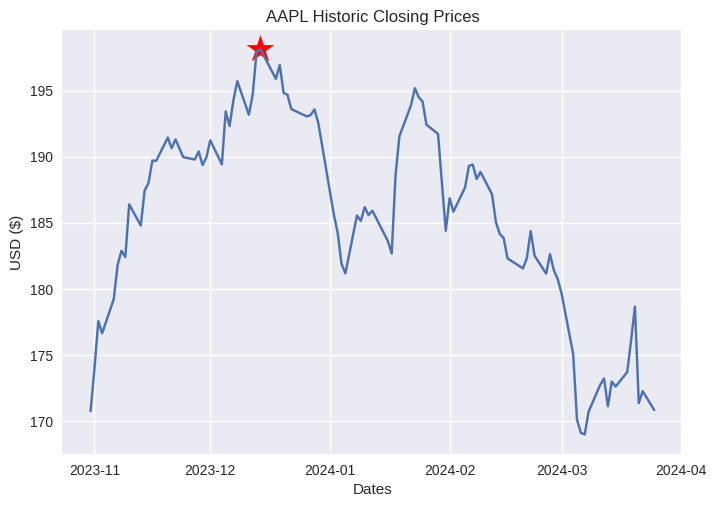

In [43]:
#plotting the closing time series and highlighting the max close value.
plt.style.use('seaborn')
plt.plot(df.index,df['4. close'])
plt.title(f"{stock} Historic Closing Prices")
plt.scatter(max_close_date.index,max_close_date['4. close'],color="red",marker="*",s=400)
plt.ylabel("USD ($)")
plt.xlabel("Dates");

In [44]:
#Vizualizing the percent change of daily stocks
returns = df['4. close'].pct_change()
returns.dropna(inplace=True)

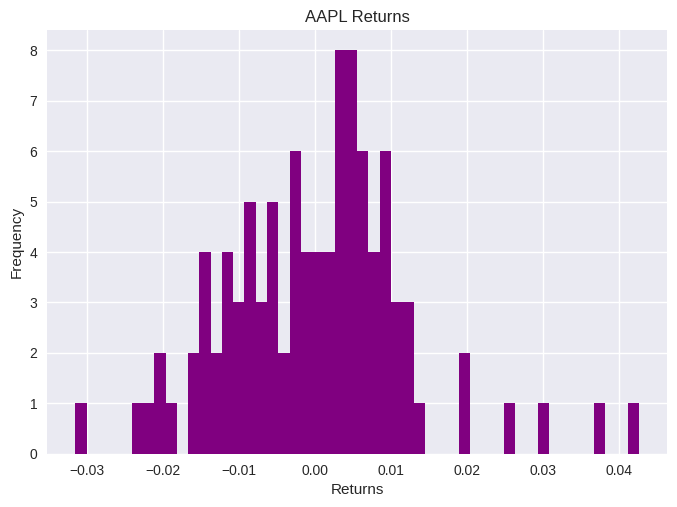

In [47]:
#plotting the change - ranging between losing 3% to gaining 4%
plt.hist(returns, bins = 50, color="purple")
plt.title(f"{stock} Returns")
plt.ylabel("Frequency")
plt.xlabel("Returns");

In [50]:
# Seeing the Mean and minimum of volume
df['5. volume'].mean()

58031772.71

In [51]:
df['5. volume'].min()

24048344